# Exploratory Data Analysis (EDA) on Economic Indicator
Created on February 24th, 2023. 

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

##1. Installation Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
from functools import reduce

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [68]:
df = pd.read_csv('../../Datasets/index-5-NFCICREDIT.csv') #Dataset file
df.head()

,DATE,NFCICREDIT
0,1971-01-08,-1.90407
1,1971-01-15,-1.90886
2,1971-01-22,-1.91133
3,1971-01-29,-1.91241
4,1971-02-05,-1.91255


In [69]:
recession = pd.read_csv('../../Datasets/Recession.csv')
recession.head()

,DATE,JHDUSRGDPBR
0,1967-10-01,0.0
1,1968-01-01,0.0
2,1968-04-01,0.0
3,1968-07-01,0.0
4,1968-10-01,0.0


## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

#### Preparing data for jobless claim
- change to datetime object **['DATE']**
- create columns
  - moving average **['SMA50']**
  - percent change from previous point(week) **['PCT']**

In [70]:
df['DATE'] = pd.to_datetime(df['DATE'])
# using .rolling(window).mean() with window size = 50
df = df.set_index('DATE')
# removing all the NULL values using dropna() method
df.dropna(inplace=True)
df.head()

,NFCICREDIT
DATE,
1971-01-08,-1.90407
1971-01-15,-1.90886
1971-01-22,-1.91133
1971-01-29,-1.91241
1971-02-05,-1.91255


#### Preparing data for recession periods
- change to datetime object **['DATE']**
- create lists
  - recession starting points 
  - recession ending points 

In [71]:
recession.columns = ['DATE', 'recession']
recession['DATE'] = pd.to_datetime(recession['DATE'])
start = []
end = []
for i, date in enumerate(recession.DATE):
  if i == 0 or i==len(recession.DATE)-1:
    continue
  if (recession.recession[i-1] == 0) & (recession.recession[i] == 1):
    start.append(date)
  elif (recession.recession[i] == 1) & (recession.recession[i+1] == 0):
    end.append(date)
print(start)
print(end)

[Timestamp('1969-04-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1979-04-01 00:00:00'), Timestamp('1981-04-01 00:00:00'), Timestamp('1989-10-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2007-10-01 00:00:00'), Timestamp('2020-01-01 00:00:00')]
[Timestamp('1970-10-01 00:00:00'), Timestamp('1975-01-01 00:00:00'), Timestamp('1980-04-01 00:00:00'), Timestamp('1982-04-01 00:00:00'), Timestamp('1991-01-01 00:00:00'), Timestamp('2001-07-01 00:00:00'), Timestamp('2009-04-01 00:00:00'), Timestamp('2020-04-01 00:00:00')]


In [72]:
Reces = pd.DataFrame()
Reces['start'] = start
Reces['end'] = end
Reces

,start,end
0,1969-04-01,1970-10-01
1,1973-10-01,1975-01-01
2,1979-04-01,1980-04-01
3,1981-04-01,1982-04-01
4,1989-10-01,1991-01-01
5,2001-01-01,2001-07-01
6,2007-10-01,2009-04-01
7,2020-01-01,2020-04-01


<Axes: xlabel='DATE'>

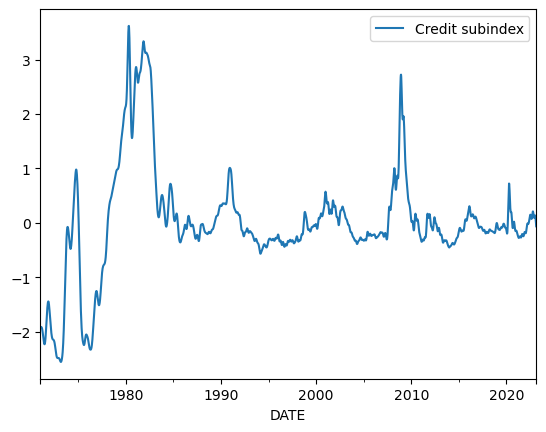

In [73]:
df.columns = ['Credit subindex']
df.plot()

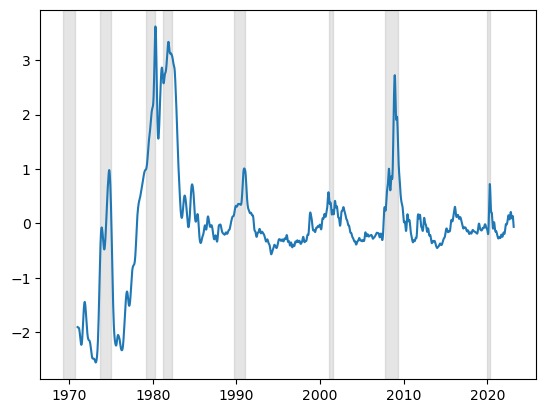

In [74]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Credit subindex'])
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
# plt.ylim(0,1e6)
plt.show()

In [75]:
df2 = df.copy()
df2.index = df2.index + dt.timedelta(days=1*30)

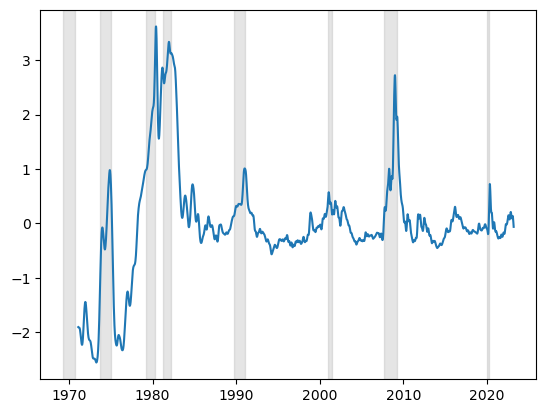

In [76]:
fig, ax = plt.subplots()
ax.plot(df2.index, df2['Credit subindex'])
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.show()

In [77]:
df2['MIN_1Y'] = np.nan
for i in range(len(df2)):
  if i >= 11:
    arr = np.array(df2['Credit subindex'])
    indices = [i-k for k in range(52)]
    take = np.take(arr, indices)
    df2['MIN_1Y'][i] = take.min()
  else:
    df2['MIN_1Y'][i] = np.nan

df2['CHG'] = (df2['Credit subindex'])/df2['MIN_1Y']

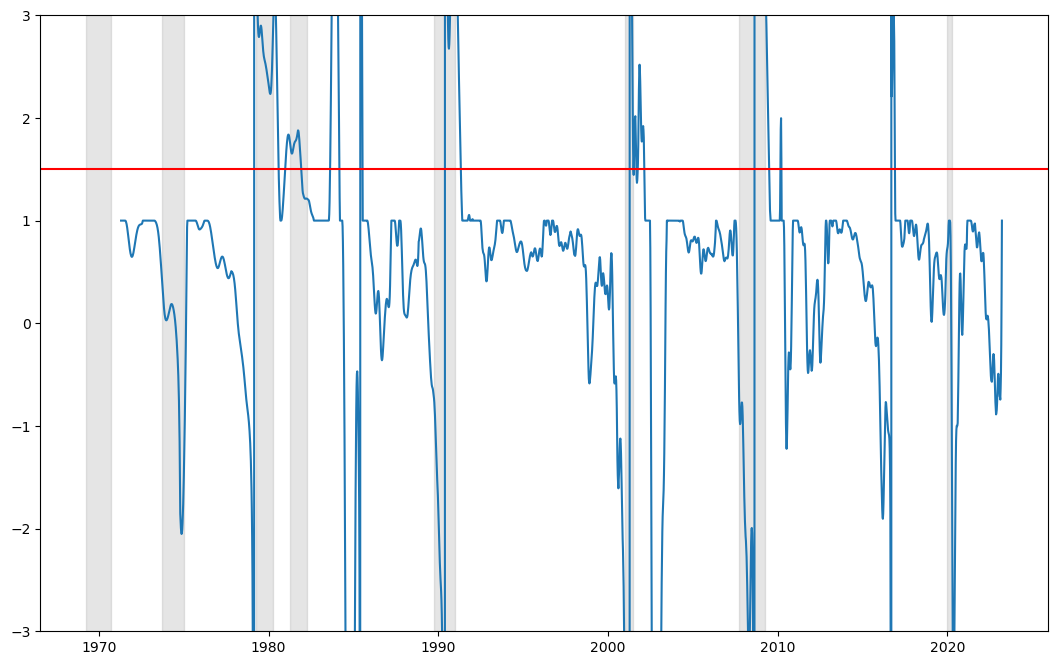

In [78]:
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df2.index, df2['CHG'])
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(1.5, color='red')
plt.ylim(-3,3)
plt.show()

In [79]:
df2['predict'] = df2['CHG'].apply(lambda x: int(x>1.5))
df2

,Credit subindex,MIN_1Y,CHG,predict
DATE,,,,
1971-02-07,-1.90407,NaN,NaN,0
1971-02-14,-1.90886,NaN,NaN,0
1971-02-21,-1.91133,NaN,NaN,0
1971-02-28,-1.91241,NaN,NaN,0
1971-03-07,-1.91255,NaN,NaN,0
...,...,...,...,...
2023-02-19,0.09946,-0.15593,-0.637850,0
2023-02-26,0.06454,-0.13077,-0.493538,0
2023-03-05,0.02167,-0.10358,-0.209210,0


In [80]:
li = []
for i in range(len(Reces)):
  li.append(df2.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[i]['start'])&(x < Reces.loc[i]['end']))))
test = reduce(lambda x,y:x+y, li)
print(test.value_counts())
df2['recession'] = test.values.copy()

DATE
0    2370
1     350
Name: count, dtype: int64


In [81]:
df2

,Credit subindex,MIN_1Y,CHG,predict,recession
DATE,,,,,
1971-02-07,-1.90407,NaN,NaN,0,0
1971-02-14,-1.90886,NaN,NaN,0,0
1971-02-21,-1.91133,NaN,NaN,0,0
1971-02-28,-1.91241,NaN,NaN,0,0
1971-03-07,-1.91255,NaN,NaN,0,0
...,...,...,...,...,...
2023-02-19,0.09946,-0.15593,-0.637850,0,0
2023-02-26,0.06454,-0.13077,-0.493538,0,0
2023-03-05,0.02167,-0.10358,-0.209210,0,0


In [82]:
def calc_TP_FP_rate(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_true[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_true[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

# Test function

calc_TP_FP_rate(df2['recession'], df2['predict'])

(0.4657142857142857, 0.0620253164556962)

In [83]:
# Containers for true positive / false positive rates
tp_rates = []
fp_rates = []

threshold = np.linspace(-20,20,num=75)

# Find true positive / false positive rate for each threshold
for t in threshold:
    
    df2['predict'] = df2['CHG'].apply(lambda x: int(x>t))
    tp_rate, fp_rate = calc_TP_FP_rate(df2['recession'], df2['predict'])
        
    tp_rates.append(tp_rate)
    fp_rates.append(fp_rate)

0.5592380952380953


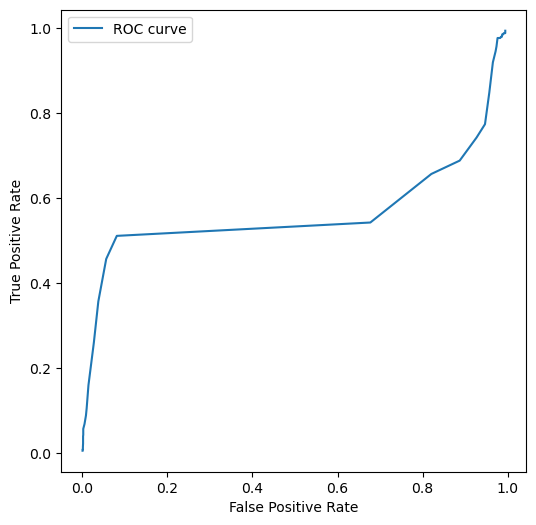

In [84]:
from sklearn.metrics import auc
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fp_rates, tp_rates, label='ROC curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();
print(auc(fp_rates,tp_rates))

In [85]:
tot = []

for i in range(0,13):
  dfi = df.copy()
  dfi.index = dfi.index + dt.timedelta(days=i*30)

  dfi['MIN_1Y'] = np.nan
  for i in range(len(dfi)):
    if i >= 51:
      arr = np.array(dfi['Credit subindex'])
      indices = [i-k for k in range(52)]
      take = np.take(arr, indices)
      dfi.iloc[i,1] = take.min()
    else:
      dfi.iloc[i,1] = np.nan

  dfi['CHG'] = (dfi['Credit subindex'])/dfi['MIN_1Y']
  li = []
  for i in range(len(Reces)):
    li.append(dfi.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[i]['start'])&(x < Reces.loc[i]['end']))))
  test = reduce(lambda x,y:x+y, li)
  dfi['recession'] = test.values.copy()
  # Containers for true positive / false positive rates
  tp_rates = []
  fp_rates = []

  threshold = np.linspace(-20,20,num=75)

  # Find true positive / false positive rate for each threshold
  for t in threshold:
      
      dfi['predict'] = dfi['CHG'].apply(lambda x: int(x>t))
      tp_rate, fp_rate = calc_TP_FP_rate(dfi['recession'], dfi['predict'])
          
      tp_rates.append(tp_rate)
      fp_rates.append(fp_rate)
  
  tot.append([fp_rates, tp_rates])

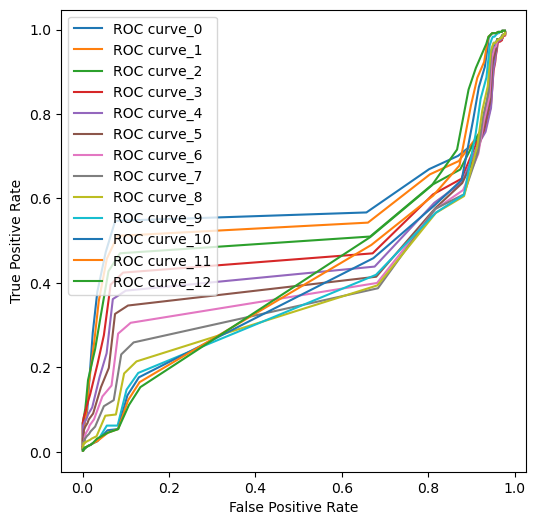

In [86]:
fig, ax = plt.subplots(figsize=(6,6))
for i in range(len(tot)):
  ax.plot(tot[i][0], tot[i][1], label=f'ROC curve_{i}')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

auc score for 0 month(s) prediction 0.5742839309745177
auc score for 1 month(s) prediction 0.5503411693791441
auc score for 2 month(s) prediction 0.5190347447373052
auc score for 3 month(s) prediction 0.48118563736968123
auc score for 4 month(s) prediction 0.448544771676895
auc score for 5 month(s) prediction 0.42434040041461923
auc score for 6 month(s) prediction 0.4015021097046414
auc score for 7 month(s) prediction 0.37908273893921846
auc score for 8 month(s) prediction 0.3637655213984329
auc score for 9 month(s) prediction 0.3638102282206593
auc score for 10 month(s) prediction 0.381327426072044
auc score for 11 month(s) prediction 0.39566804847514003
auc score for 12 month(s) prediction 0.4058978856342138


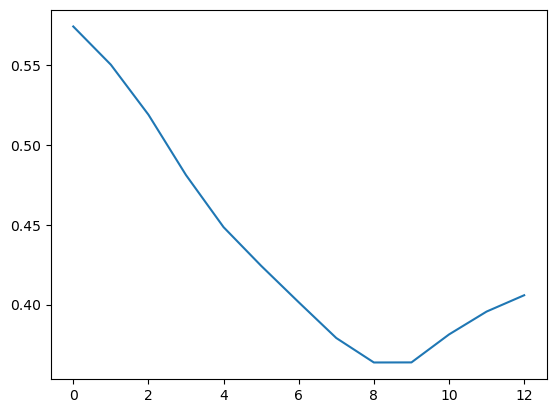

In [87]:
from sklearn.metrics import auc
auc_x = []
auc_y = []
for i in range(len(tot)):
  auc_x.append(i)
  auc_y.append(auc(tot[i][0], tot[i][1]))
  print(f'auc score for {i} month(s) prediction {auc_y[i]}')
plt.plot(auc_x, auc_y)

In [114]:
temp = pd.DataFrame()
temp['False positive'] = tot[1][0]
temp['True positive'] = tot[1][1]
temp

,False positive,True positive
0,0.977637,0.994286
1,0.977637,0.994286
2,0.977637,0.994286
3,0.977637,0.991429
4,0.977637,0.991429
...,...,...
70,0.000844,0.008571
71,0.000422,0.008571
72,0.000422,0.008571
73,0.000422,0.005714


In [95]:
# choose 0.08,0.51 find threshold
threshold = np.linspace(-20,20,num=75)
final_thres = threshold[39]
print(final_thres)

1.0810810810810807


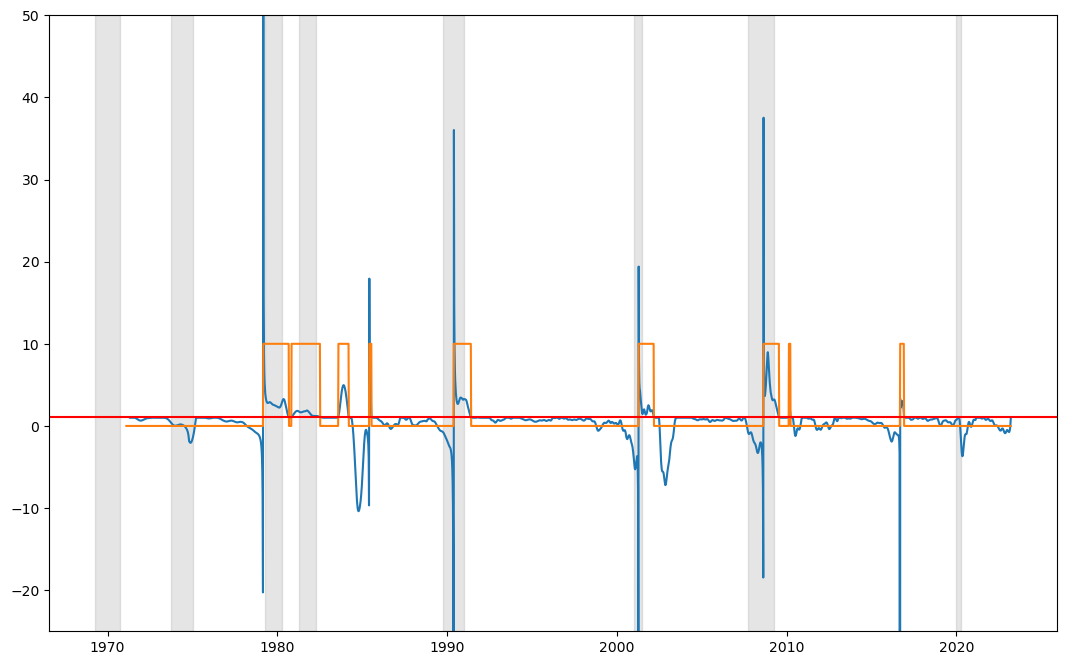

In [100]:
df2['predict'] = df2['CHG'].apply(lambda x: int(x>final_thres))
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df2.index, df2['CHG'])
ax.plot(df2.index, df2['predict']*10)
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(final_thres, color='red')
plt.ylim(-25,50)
plt.show()

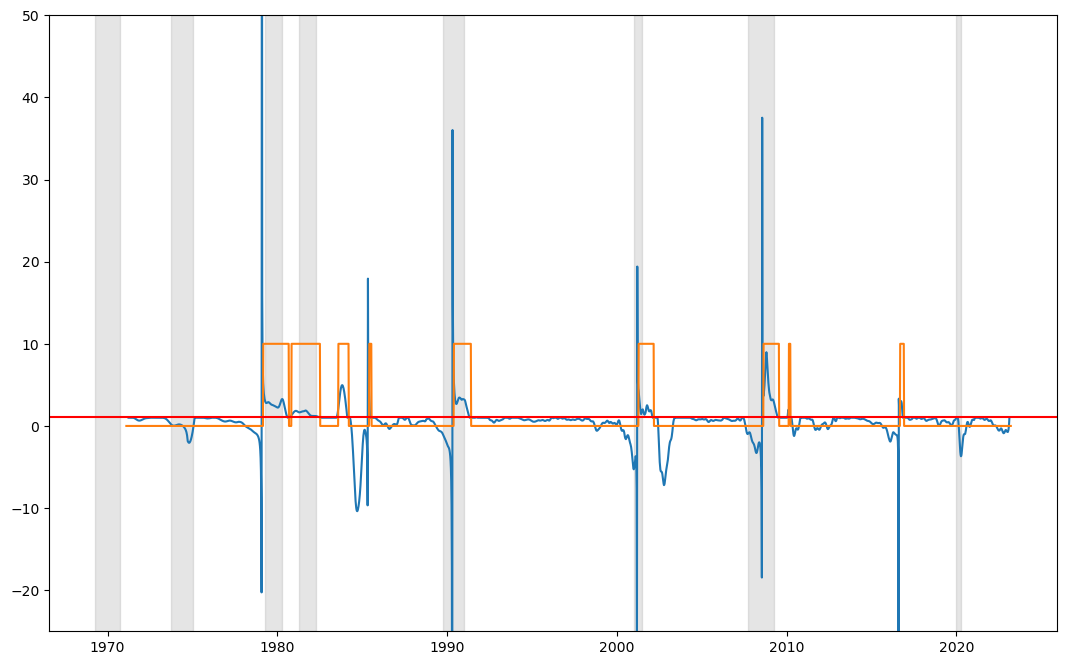

In [101]:
df2['predict'] = df2['CHG'].apply(lambda x: int(x>final_thres))
df3 = df2.copy()
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df.index, df2['CHG'])
ax.plot(df2.index, df2['predict']*10)
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(final_thres, color='red')
plt.ylim(-25,50)
plt.show()

In [104]:
# Containers for true positive / false positive rates
tp_rates2 = []
fp_rates2 = []

threshold = np.linspace(-20,20,num=75)

# Find true positive / false positive rate for each threshold
for t in threshold:
    
    df2['predict2'] = df2['CHG'].apply(lambda x: int(x<t))
    tp_rate, fp_rate = calc_TP_FP_rate(df2['recession'], df2['predict2'])
        
    tp_rates2.append(tp_rate)
    fp_rates2.append(fp_rate)

0.4348547317661241


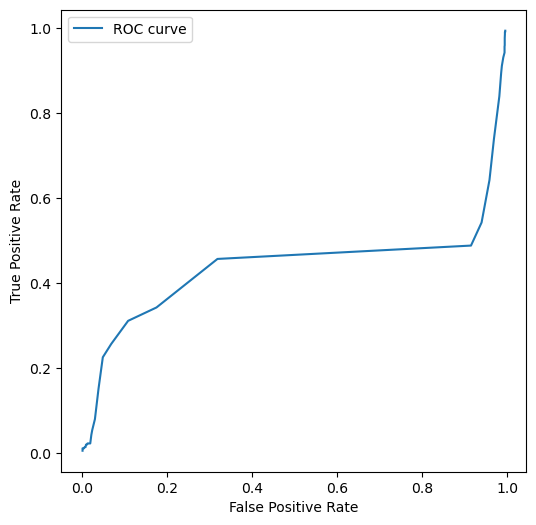

In [105]:
from sklearn.metrics import auc
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fp_rates2, tp_rates2, label='ROC curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();
print(auc(fp_rates2,tp_rates2))

In [106]:
tot2 = []

for i in range(0,13):
  dfi = df.copy()
  dfi.index = dfi.index + dt.timedelta(days=i*30)

  dfi['MIN_1Y'] = np.nan
  for i in range(len(dfi)):
    if i >= 51:
      arr = np.array(dfi['Credit subindex'])
      indices = [i-k for k in range(52)]
      take = np.take(arr, indices)
      dfi.iloc[i,1] = take.min()
    else:
      dfi.iloc[i,1] = np.nan

  dfi['CHG'] = (dfi['Credit subindex'])/dfi['MIN_1Y']
  li = []
  for i in range(len(Reces)):
    li.append(dfi.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[i]['start'])&(x < Reces.loc[i]['end']))))
  test = reduce(lambda x,y:x+y, li)
  dfi['recession'] = test.values.copy()
  # Containers for true positive / false positive rates
  tp_rates2 = []
  fp_rates2 = []

  threshold = np.linspace(-20,20,num=75)

  # Find true positive / false positive rate for each threshold
  for t in threshold:
      
      dfi['predict2'] = dfi['CHG'].apply(lambda x: int(x<t))
      tp_rate, fp_rate = calc_TP_FP_rate(dfi['recession'], dfi['predict2'])
          
      tp_rates2.append(tp_rate)
      fp_rates2.append(fp_rate)
  
  tot2.append([fp_rates2, tp_rates2])

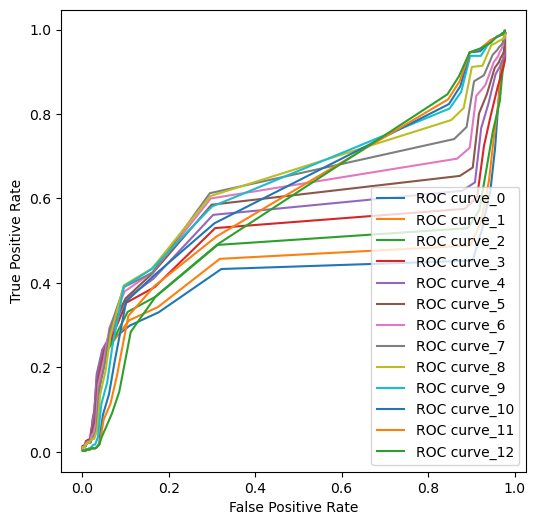

In [107]:
fig, ax = plt.subplots(figsize=(6,6))
for i in range(len(tot2)):
  ax.plot(tot2[i][0], tot2[i][1], label=f'ROC curve_{i}')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

auc score for 0 month(s) prediction 0.4029216409967782
auc score for 1 month(s) prediction 0.4268740204942736
auc score for 2 month(s) prediction 0.4585740427574139
auc score for 3 month(s) prediction 0.4968641726767518
auc score for 4 month(s) prediction 0.5290829193319696
auc score for 5 month(s) prediction 0.553277842828624
auc score for 6 month(s) prediction 0.5761350210970463
auc score for 7 month(s) prediction 0.598544952069646
auc score for 8 month(s) prediction 0.6138716094032549
auc score for 9 month(s) prediction 0.6125311321511194
auc score for 10 month(s) prediction 0.5950339078241147
auc score for 11 month(s) prediction 0.5806932854210186
auc score for 12 month(s) prediction 0.5704534657171375


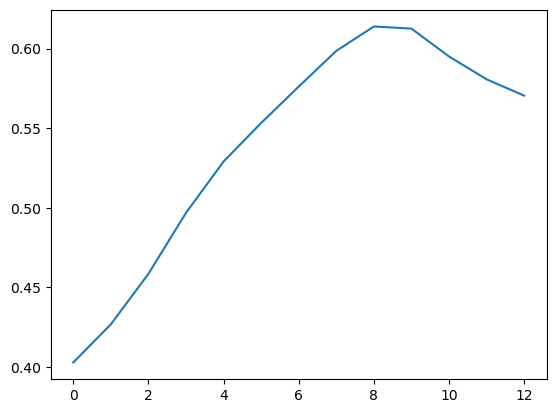

In [108]:
from sklearn.metrics import auc
auc_x = []
auc_y = []
for i in range(len(tot2)):
  auc_x.append(i)
  auc_y.append(auc(tot2[i][0], tot2[i][1]))
  print(f'auc score for {i} month(s) prediction {auc_y[i]}')
plt.plot(auc_x, auc_y)

In [117]:
temp1 = pd.DataFrame()
temp1['False positive'] = tot[8][0]
temp1['True positive'] = tot[8][1]
temp1[30:40]

,False positive,True positive
30,0.948945,0.962857
31,0.944304,0.948571
32,0.941350,0.917143
33,0.937553,0.865714
34,0.924895,0.808571
35,0.913080,0.722857
36,0.882700,0.605714
37,0.817300,0.565714
38,0.682278,0.394286
39,0.124895,0.214286


In [122]:
# choose 0.68,0.39 find threshold
threshold2 = np.linspace(-20,20,num=75)
final_thres2 = threshold2[38]
print(final_thres2)

0.5405405405405403


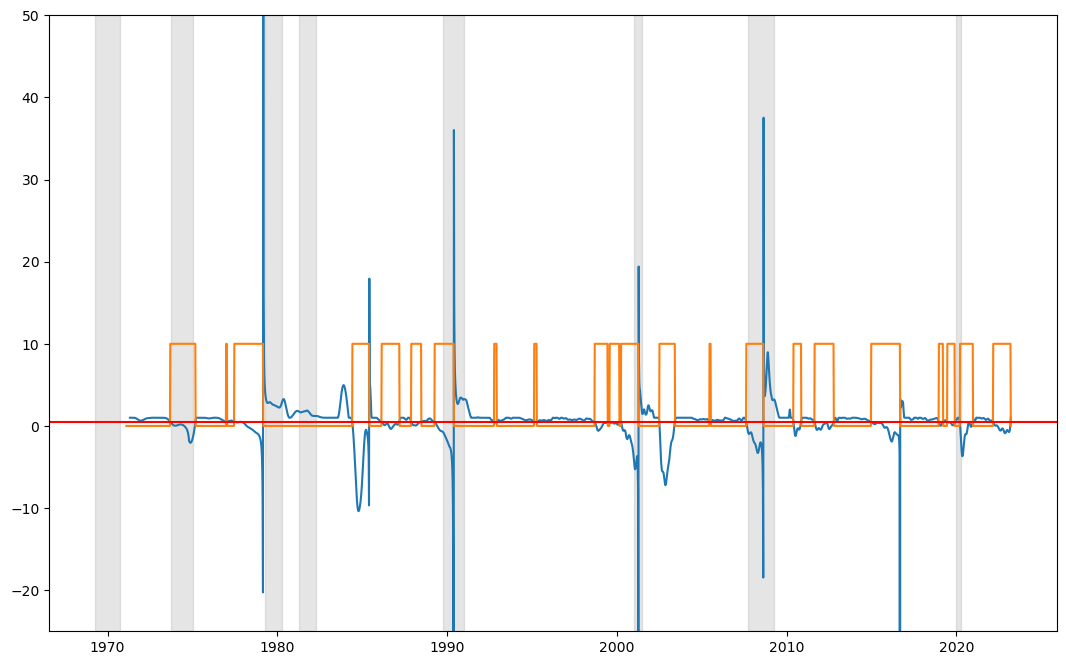

In [123]:
df2['predict2'] = df2['CHG'].apply(lambda x: int(x<final_thres2))
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df2.index, df2['CHG'])
ax.plot(df2.index, df2['predict2']*10)
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(final_thres2, color='red')
plt.ylim(-25,50)
plt.show()

KeyError: 'CHG'

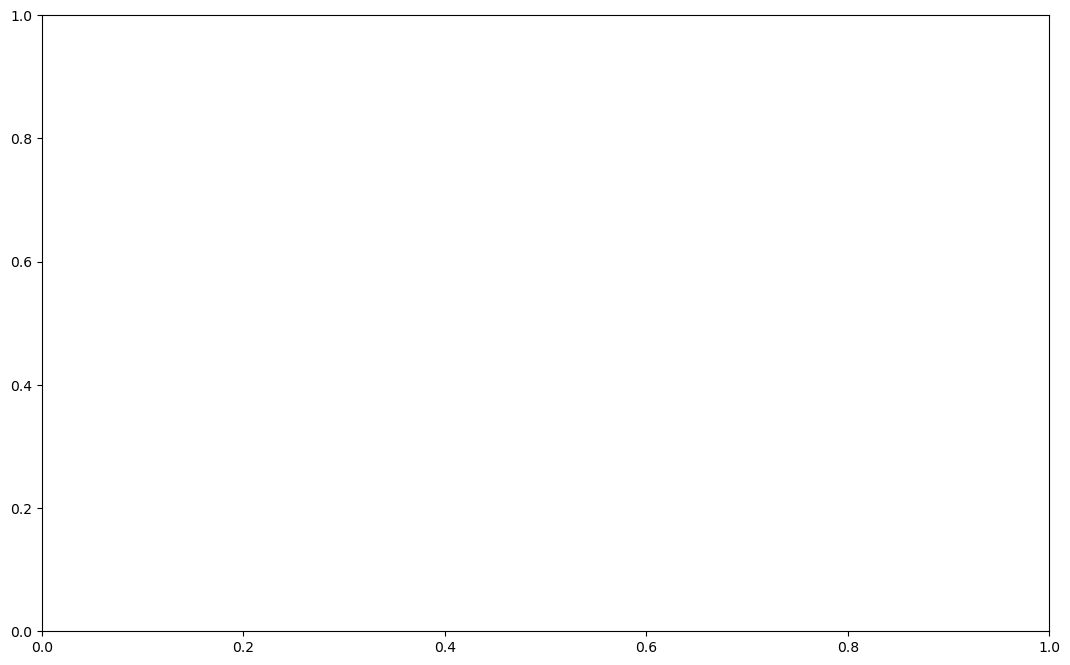

In [125]:
df2['predict2'] = df2['CHG'].apply(lambda x: int(x<final_thres))
df2=df.copy()
df2.index = df2.index + dt.timedelta(days=8*30)
dfi['MIN_1Y'] = np.nan
for i in range(len(dfi)):
  if i >= 51:
    arr = np.array(dfi['Credit subindex'])
    indices = [i-k for k in range(52)]
    take = np.take(arr, indices)
    dfi.iloc[i,1] = take.min()
  else:
    dfi.iloc[i,1] = np.nan
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df.index, df2['CHG'])
ax.plot(df2.index, df2['predict2']*10)
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(final_thres2, color='red')
plt.ylim(-25,50)
plt.show()